   id  having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
0   1                 -1           1                   1                 1   
1   2                  1           1                   1                 1   
2   3                  1           0                   1                 1   
3   4                  1           0                   1                 1   
4   5                  1           0                  -1                 1   

   double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  SSLfinal_State  \
0                        -1             -1                 -1              -1   
1                         1             -1                  0               1   
2                         1             -1                 -1              -1   
3                         1             -1                 -1              -1   
4                         1             -1                  1               1   

   Domain_registeration_length  ...  popUpWi

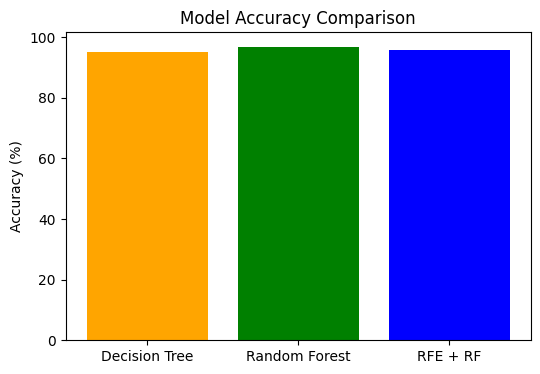

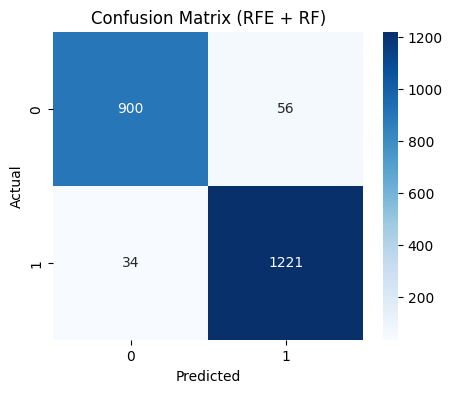


Classification Report (RFE + RF):

              precision    recall  f1-score   support

          -1       0.96      0.94      0.95       956
           1       0.96      0.97      0.96      1255

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [4]:
# ==========================================
# Phishing Website Detection using ML
# Based on Saxena & Chaudhary (IJRASET 2021)
# ==========================================

# 1️ IMPORT LIBRARIES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 2️ LOAD DATASET
data_path = "/content/uci-ml-phishing-dataset.csv"
if not os.path.exists(data_path):
    raise FileNotFoundError("Dataset not found! Please download from UCI and save as data/phishing.csv")

df = pd.read_csv(data_path)
print(df.head())

# 3️ SPLIT FEATURES & TARGET
X = df.drop('Result', axis=1)
y = df['Result']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4️ DECISION TREE MODEL
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, pred_dt)
print("Decision Tree Accuracy:", round(acc_dt*100,2), "%")

# 5️ RANDOM FOREST MODEL
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)
print("Random Forest Accuracy:", round(acc_rf*100,2), "%")

# 6️ RFE + RANDOM FOREST
rfe = RFE(RandomForestClassifier(random_state=42), n_features_to_select=15)
X_rfe = rfe.fit_transform(X, y)
# Split RFE data
Xtr, Xte, ytr, yte = train_test_split(X_rfe, y, test_size=0.2, random_state=42)
rf_rfe = RandomForestClassifier(random_state=42)
rf_rfe.fit(Xtr, ytr)
pred_rfe = rf_rfe.predict(Xte)
acc_rfe = accuracy_score(yte, pred_rfe)
print("RFE + RF Accuracy:", round(acc_rfe*100,2), "%")

# 7️ PLOT MODEL ACCURACIES
# Create images folder if not exists
if not os.path.exists("../images"):
    os.makedirs("../images")

plt.figure(figsize=(6,4))
plt.bar(['Decision Tree','Random Forest','RFE + RF'], [acc_dt*100, acc_rf*100, acc_rfe*100], color=['orange','green','blue'])
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.savefig('../images/accuracy_comparison.png', bbox_inches='tight')
plt.show()

# 8 CONFUSION MATRIX FOR RFE + RF
cm = confusion_matrix(yte, pred_rfe)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (RFE + RF)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('../images/confusion_matrix.png', bbox_inches='tight')
plt.show()

# 9️ CLASSIFICATION REPORT
print("\nClassification Report (RFE + RF):\n")
print(classification_report(yte, pred_rfe))
